In [95]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import time as t
import datetime as dt
import string as st
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from numpy import genfromtxt
import math as m
from __future__ import print_function

In [103]:
X_matrix = np.genfromtxt('Martrix_X_streamingserver.csv', delimiter=';');
#Y_matrix = np.genfromtxt('Martrix_Y_streamingserver.csv', delimiter=';');
y = np.genfromtxt('Martrix_Y_streamingserver.csv',delimiter=';')

#data = [1] * 3 + [2] * 3
#data *= 3
data = y[1:1050];
print(data)

[ 7.53333333  6.33333333  7.86666667 ...,  8.33333333  7.33333333
  7.26666667]


In [104]:
from pybrain.datasets import SequentialDataSet
from itertools import cycle

ds = SequentialDataSet(1, 1)
for sample, next_sample in zip(data, cycle(data[1:])):
    ds.addSample(sample, next_sample)

In [105]:
from pybrain.tools.shortcuts import buildNetwork
from pybrain.structure.modules import LSTMLayer

net = buildNetwork(1, 5, 1, 
                   hiddenclass=LSTMLayer, outputbias=False, recurrent=True)

In [106]:
from pybrain.supervised import RPropMinusTrainer
from sys import stdout

trainer = RPropMinusTrainer(net, dataset=ds)
train_errors = [] # save errors for plotting later
EPOCHS_PER_CYCLE = 5
CYCLES = 100
EPOCHS = EPOCHS_PER_CYCLE * CYCLES
for i in xrange(CYCLES):
    trainer.trainEpochs(EPOCHS_PER_CYCLE)
    train_errors.append(trainer.testOnData())
    epoch = (i+1) * EPOCHS_PER_CYCLE
    print("\r epoch {}/{}".format(epoch, EPOCHS), end="")
    stdout.flush()

print()
print("final error =", train_errors[-1])

 epoch 500/500
final error = 9.47245914512


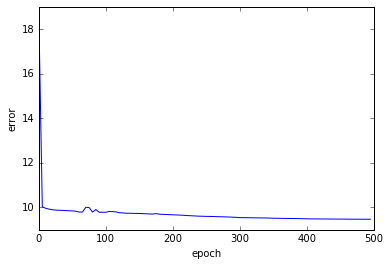

In [107]:
import matplotlib.pyplot as plt

plt.plot(range(0, EPOCHS, EPOCHS_PER_CYCLE), train_errors)
plt.xlabel('epoch')
plt.ylabel('error')

In [140]:
#from sklearn.metrics import mean_squared_error
from math import sqrt
#from __future__ import math


sample = y[1050:1495];
target = y[1051:1496];
error = 0.0;
printl = 0;
eer = 0.0;
for i in range(np.size(sample)):
    error += (net.activate(sample[i])-sample[i])**2;
    if printl :
        print("               sample = %4.1f" % sample[i])
        print("predicted next sample = %4.1f" % net.activate(sample[i]))
        print("   actual next sample = %4.1f" % target[i])
        print()      
err = sqrt(error/np.size(sample));    
print("The Root Mean Squared Error ",err);
    
'''    
for i in range(np.size(y)-1):
    error += (y[i] - net.activate(y[i]))**2;
print('The error is Error = ', (error/np.size(y)))
'''

The Root Mean Squared Error  1.7076843204


"    \nfor i in range(np.size(y)-1):\n    error += (y[i] - net.activate(y[i]))**2;\nprint('The error is Error = ', (error/np.size(y)))\n"

In [ ]:
# draw the two function side by side please